In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [3]:
df = pd.read_json(r'C:\Users\Simon\CSCI370\Klein2\twitterScrape\COv4.json')
#Importing .json file from twitter scraper to pandas dataframe
df

,followers,followers_list,following,following_list,location,name,tid
0,"14,972",cccunion clavito_robert Ltech_Ndlovu DmitryMed...,"1,120",S_HastingsSimon TimBrandon5 RMAC_SAAC coachTth...,"Golden, CO",Colorado School of Mines\n,coschoolofmines
1,"1,364",jhubbard67 AidanOstrowski WillGavin3 Misty_555...,662,marlinreeves19 NaturelsLit keatons28 JanekTrey...,"Golden, CO",Tim Brandon\n,TimBrandon5
2,156,sydneymar3 chelseabrew14 Brjoho31 mike_sybrant...,123,d2cca D2SIDA1 AsgCmu gabbyguppyfish RegisRange...,"Colorado Springs, CO",RMAC SAAC\n,RMAC_SAAC
3,"1,240",CarolSt68489738 Nick_Burrows58 GrantGoltra tyl...,785,EliManning GrantGoltra franco_trey TXPrivateFB...,"Golden, CO",Tripp Thomas\n,coachTthomas6
4,39,milan_agnani EndritSelmanll1 HeatherMaimone Ch...,161,StanfordEng dSeanMustard asalleo electrochemic...,"Golden, CO",Allison Lim\n,AllisonLim94
5,78,FARHANHYDRO AF_8080 hemant59735290 j__quiroz a...,35,AMSHydrology NasrinAlamdari DustinMulvaney Jes...,"Boulder, CO",Katie Spahr\n,ktspahr
6,53,EndritSelmanll1 dilufapy re_abdi spearmicrobe ...,63,mavega2145 hydro_katie gary_vanzin CDPHE Govof...,"Golden, CO",Kate Newhart\n,KateNewhart
7,39,Earlene_15333 milan_agnani denizege222 Aldeke ...,212,cvmgsa RiceGSA NUGSA1 browngsc harvardphysics ...,"Golden, CO",Graduate Student Government - CSM\n,mines_gsg
8,272,_HDHamilton chuanzhang_pu Arun_K_Raj ReadMeLik...,166,ReadMeLikeANook ManthiramLab TaalalAshraf Maha...,"Golden, CO",CORES Research Group\n,CORESresearch
9,32,_RubyRedbird vanshil_shah prasuchit lisaD47713...,92,haozhang_hcr HCRoboticsLab prasuchit f_lindner...,"Golden, CO",Mines Robotics\n,MinesRobotics


In [4]:
for i in range(2):
    for n in df.name:
        new = n.replace('\n','')
        person = np.array([token for token in nlp(new) if token.ent_type_ == 'PERSON'])
        for token in person:
            strtoken = str(token)
            if not strtoken.strip():
                person = np.delete(person,np.argwhere(person==token))
        if person.size == 0:
            df = df.drop(df[df.name == n].index.values.astype(int)[0])
        else:
            person = [token.orth_ for token in person]
            df = df.replace({'name' : n}, ' '.join(person))
df.reset_index(drop=True,inplace=True)

In [5]:
df

,followers,followers_list,following,following_list,location,name,tid
0,"1,364",jhubbard67 AidanOstrowski WillGavin3 Misty_555...,662,marlinreeves19 NaturelsLit keatons28 JanekTrey...,"Golden, CO",Tim Brandon,TimBrandon5
1,"1,240",CarolSt68489738 Nick_Burrows58 GrantGoltra tyl...,785,EliManning GrantGoltra franco_trey TXPrivateFB...,"Golden, CO",Tripp Thomas,coachTthomas6
2,39,milan_agnani EndritSelmanll1 HeatherMaimone Ch...,161,StanfordEng dSeanMustard asalleo electrochemic...,"Golden, CO",Allison Lim,AllisonLim94
3,78,FARHANHYDRO AF_8080 hemant59735290 j__quiroz a...,35,AMSHydrology NasrinAlamdari DustinMulvaney Jes...,"Boulder, CO",Katie Spahr,ktspahr
4,53,EndritSelmanll1 dilufapy re_abdi spearmicrobe ...,63,mavega2145 hydro_katie gary_vanzin CDPHE Govof...,"Golden, CO",Kate Newhart,KateNewhart
5,276,sfstarr1 katelynafitz mayer_water jackie_v_d_h...,460,ec0p0lis AForkInTheRiver katelynafitz DirtyInT...,"Golden, CO",Kyle Blount,hydro_kyleb
6,25,TimBrandon5 HSFBshowcase lucy_quintana16 24aar...,12,24aaronjacob24 CoPreps ashonasty maleia_ko emi...,"Colorado Springs, CO",Jaseim Mitchell,Jaseim95466171
7,65,JoshuaLikens153 TimBrandon5 sydnee_roz16 Sport...,287,Rivals CoachNFulton CoachDiedrick madbacker56 ...,"Cañon City, CO",Owen Busetti,OwenBusetti_13
8,"1,017",MadroSkelton32 cshhoopsclub _CoachMitchell Ver...,603,VeraJoBustos MRHSGirlsBall RockiesBasketb1 CHS...,"Denver, CO",Regis Rangers WBB,RegisRangersWBB
9,827,DrMattHH ChanLabUIUC MarcoValentiG DnyaneshRas...,896,FaiolaLabUCI OttLaboratory ChemistryDrug JCOSR...,"Golden, CO",Christine Morrison,CMorrisonLab


C:\Users\Simon\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Simon\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56595 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Simon\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55358 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Simon\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56595 missing from current font.
  font.set_text(s, 0, flags=flags)


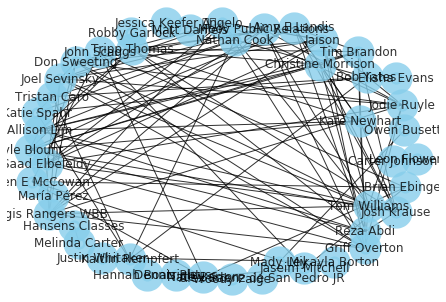

In [6]:
G = nx.Graph()
G.add_nodes_from(df.name.tolist())

for index,i in enumerate(G.nodes()):
    temp = list(G.nodes)
    temp.pop(index)
    for j in temp:
        if df[df.name == i].location.to_string(index=False) == df[df.name == j].location.to_string(index=False):
            G.add_edge(i,j)
            
posDict = nx.spring_layout(G,k=5)
nx.draw(G,with_labels = True, node_size=150, node_color="skyblue",
       pos = posDict, alpha=.8,linewidths=20)
plt.show()